[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab09.ipynb)

**Train the model**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set device and random seeds
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)

# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2048, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# 2. Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 2048)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(2048, 256)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.relu3(self.linear3(x))
        x = self.linear4(x)
        x = self.dropout(x)
        return x

# 3. Train the Model
def train_model():
    model = MLP().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print("Training MNIST classifier...")
    for epoch in range(8):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

    # Test accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")
    return model

# Train model and freeze parameters
model = train_model()
model.eval()
for param in model.parameters():
    param.requires_grad = False


Training MNIST classifier...


Epoch 1: 100%|██████████| 30/30 [00:36<00:00,  1.21s/it]


Epoch 1, Loss: 0.6782


Epoch 2: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


Epoch 2, Loss: 0.1970


Epoch 3: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


Epoch 3, Loss: 0.1281


Epoch 4: 100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


Epoch 4, Loss: 0.0912


Epoch 5: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


Epoch 5, Loss: 0.0690


Epoch 6: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


Epoch 6, Loss: 0.0566


Epoch 7: 100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


Epoch 7, Loss: 0.0442


Epoch 8: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


Epoch 8, Loss: 0.0400
Test Accuracy: 97.90%


**Use trained model and change the input digits based on losses**


=== Task 1: Generating digits 0-9 from noise ===
Iteration 0: Loss = 5.5663, Avg Confidence = 0.0927
Iteration 50: Loss = 1.6601, Avg Confidence = 0.3442
Iteration 100: Loss = 0.4694, Avg Confidence = 0.6998
Iteration 150: Loss = 0.1926, Avg Confidence = 0.8392
Iteration 200: Loss = 0.1066, Avg Confidence = 0.9023
Iteration 250: Loss = 0.0719, Avg Confidence = 0.9319
Iteration 300: Loss = 0.0544, Avg Confidence = 0.9477
Iteration 350: Loss = 0.0438, Avg Confidence = 0.9575
Iteration 400: Loss = 0.0367, Avg Confidence = 0.9642
Iteration 450: Loss = 0.0315, Avg Confidence = 0.9692
Iteration 499: Loss = 0.0277, Avg Confidence = 0.9728


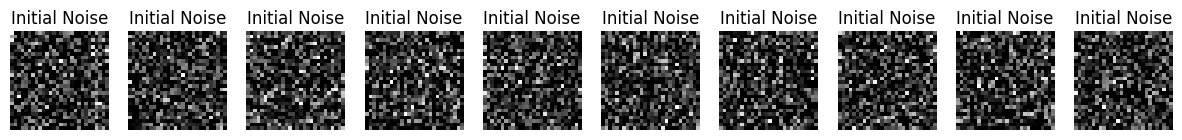

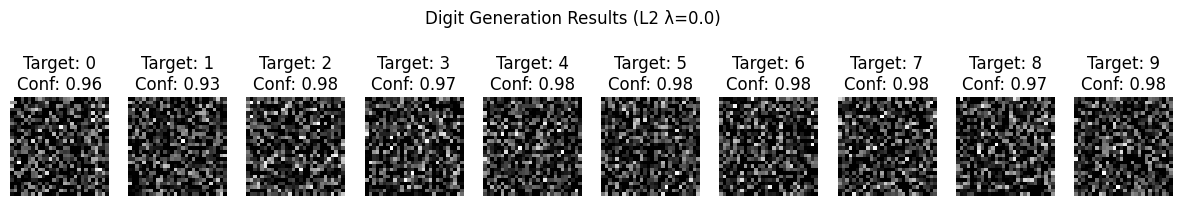

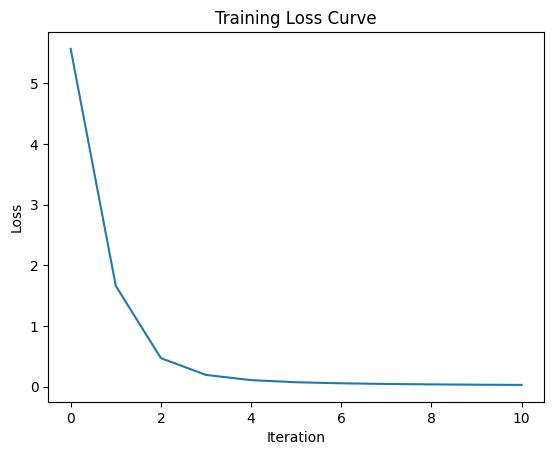


=== Task 2: Generating hybrid digits ===
Iteration 0: Loss = 7.6145
Probabilities: {tensor(3): 0.0012962743639945984, tensor(8): 0.00018767622532323003}
Iteration 50: Loss = 0.7717
Probabilities: {tensor(3): 0.45486700534820557, tensor(8): 0.4697518050670624}
Iteration 100: Loss = 0.7364
Probabilities: {tensor(3): 0.47547638416290283, tensor(8): 0.4822443127632141}
Iteration 150: Loss = 0.7240
Probabilities: {tensor(3): 0.48246678709983826, tensor(8): 0.4871627390384674}
Iteration 200: Loss = 0.7173
Probabilities: {tensor(3): 0.4861941933631897, tensor(8): 0.48992720246315}
Iteration 250: Loss = 0.7131
Probabilities: {tensor(3): 0.4887901842594147, tensor(8): 0.4914851784706116}
Iteration 300: Loss = 0.7101
Probabilities: {tensor(3): 0.4904816448688507, tensor(8): 0.49267566204071045}
Iteration 350: Loss = 0.7080
Probabilities: {tensor(3): 0.4917226731777191, tensor(8): 0.49353596568107605}
Iteration 400: Loss = 0.7064
Probabilities: {tensor(3): 0.4926455318927765, tensor(8): 0.494217

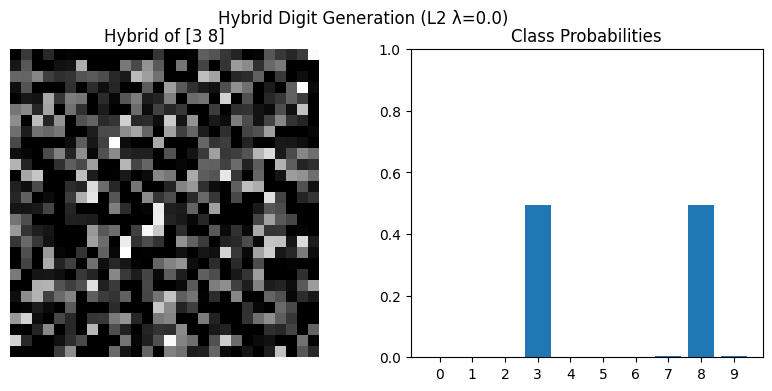

Iteration 0: Loss = 4.3471
Probabilities: {tensor(0): 0.01843162439763546, tensor(6): 0.009089900180697441}
Iteration 50: Loss = 0.7397
Probabilities: {tensor(0): 0.47681933641433716, tensor(6): 0.47766703367233276}
Iteration 100: Loss = 0.7173
Probabilities: {tensor(0): 0.4877350926399231, tensor(6): 0.4884014129638672}
Iteration 150: Loss = 0.7105
Probabilities: {tensor(0): 0.49116796255111694, tensor(6): 0.4916187524795532}
Iteration 200: Loss = 0.7069
Probabilities: {tensor(0): 0.4929271340370178, tensor(6): 0.4934536814689636}
Iteration 250: Loss = 0.7045
Probabilities: {tensor(0): 0.49398189783096313, tensor(6): 0.4947027862071991}
Iteration 300: Loss = 0.7030
Probabilities: {tensor(0): 0.4947342276573181, tensor(6): 0.49548032879829407}
Iteration 350: Loss = 0.7019
Probabilities: {tensor(0): 0.49530115723609924, tensor(6): 0.4960092008113861}
Iteration 400: Loss = 0.7010
Probabilities: {tensor(0): 0.49574822187423706, tensor(6): 0.4964008331298828}
Iteration 450: Loss = 0.7003
P

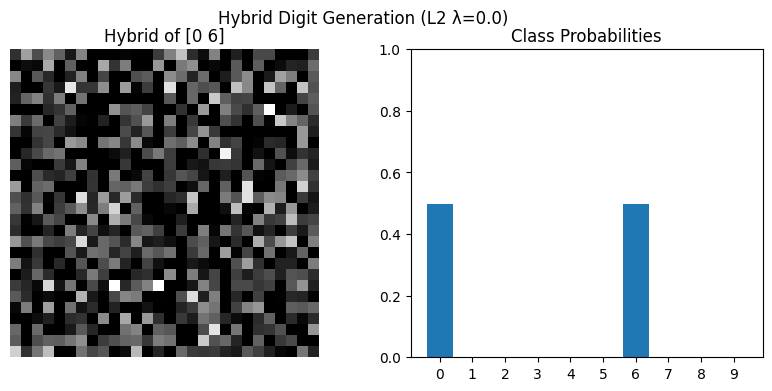


=== Task 3: Testing L2 regularization ===

Generating with L2 λ=0.001
Iteration 0: Loss = 5.3414, Avg Confidence = 0.0354
Iteration 50: Loss = 1.8131, Avg Confidence = 0.3456
Iteration 100: Loss = 0.4005, Avg Confidence = 0.6931
Iteration 150: Loss = 0.1628, Avg Confidence = 0.8542
Iteration 200: Loss = 0.1039, Avg Confidence = 0.9039
Iteration 250: Loss = 0.0766, Avg Confidence = 0.9282
Iteration 299: Loss = 0.0610, Avg Confidence = 0.9424


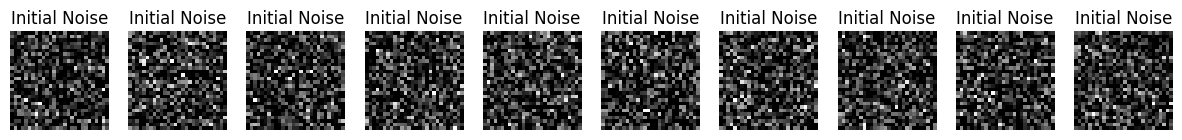

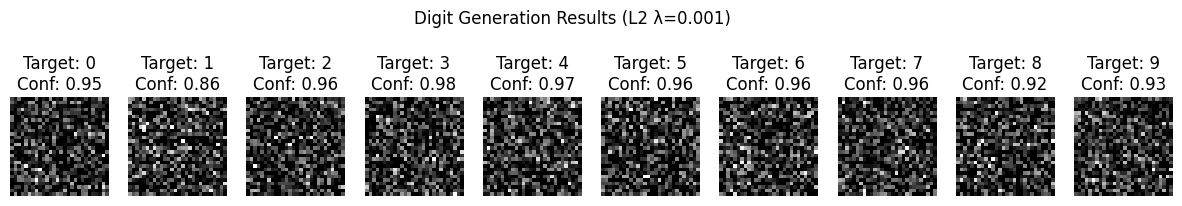

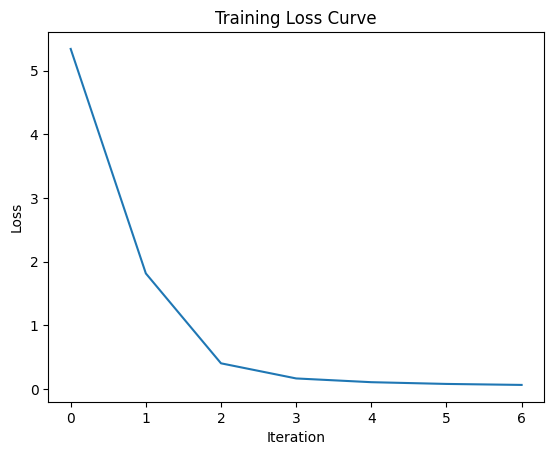


Generating with L2 λ=0.01
Iteration 0: Loss = 5.5366, Avg Confidence = 0.0506
Iteration 50: Loss = 1.6699, Avg Confidence = 0.3814
Iteration 100: Loss = 0.3954, Avg Confidence = 0.7146
Iteration 150: Loss = 0.1899, Avg Confidence = 0.8475
Iteration 200: Loss = 0.1264, Avg Confidence = 0.8961
Iteration 250: Loss = 0.0950, Avg Confidence = 0.9219
Iteration 299: Loss = 0.0767, Avg Confidence = 0.9376


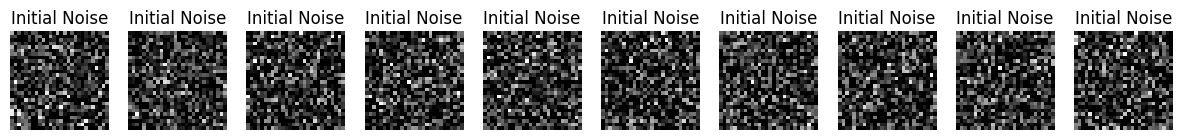

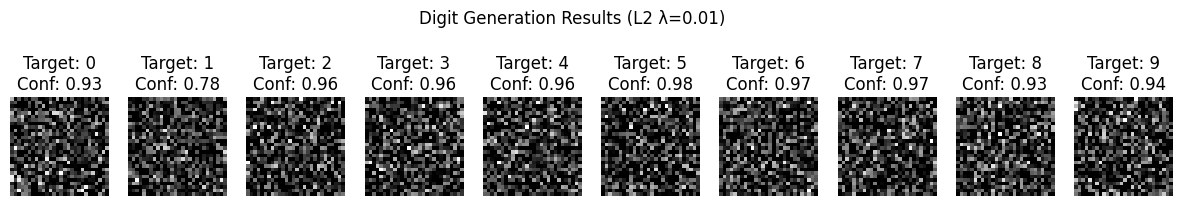

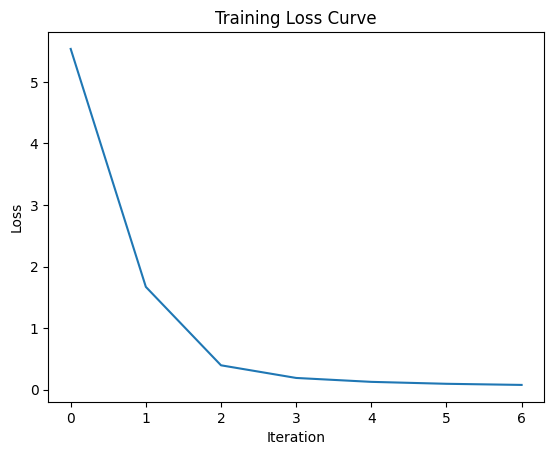


Generating with L2 λ=0.1
Iteration 0: Loss = 5.2369, Avg Confidence = 0.1402
Iteration 50: Loss = 2.3919, Avg Confidence = 0.4070
Iteration 100: Loss = 1.2807, Avg Confidence = 0.6800
Iteration 150: Loss = 0.8632, Avg Confidence = 0.7775
Iteration 200: Loss = 0.4520, Avg Confidence = 0.8250
Iteration 250: Loss = 0.2061, Avg Confidence = 0.9064
Iteration 299: Loss = 0.1696, Avg Confidence = 0.9362


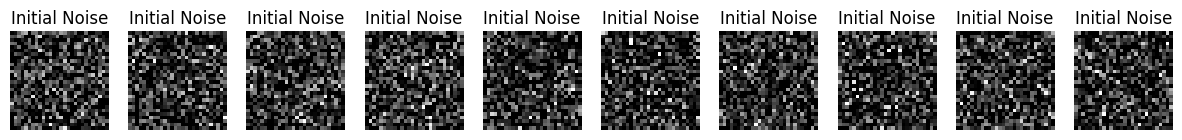

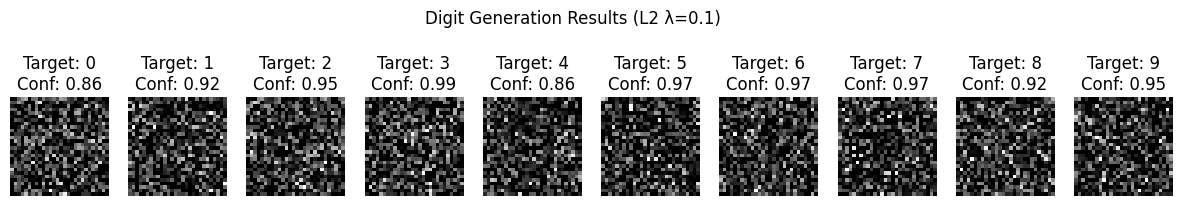

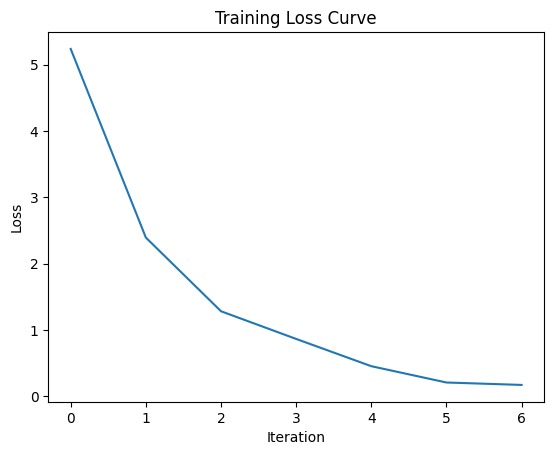


Generating with L2 λ=1.0
Iteration 0: Loss = 6.0951, Avg Confidence = 0.0682
Iteration 50: Loss = 2.6589, Avg Confidence = 0.3732
Iteration 100: Loss = 1.5827, Avg Confidence = 0.6684
Iteration 150: Loss = 1.2301, Avg Confidence = 0.8103
Iteration 200: Loss = 1.1244, Avg Confidence = 0.8815
Iteration 250: Loss = 1.0812, Avg Confidence = 0.9156
Iteration 299: Loss = 1.0585, Avg Confidence = 0.9339


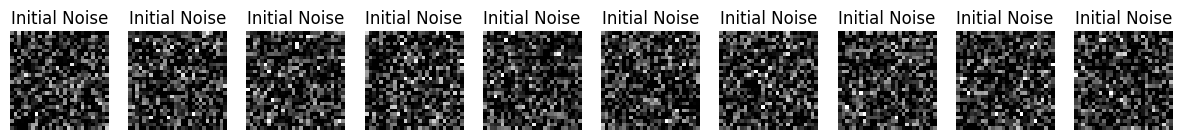

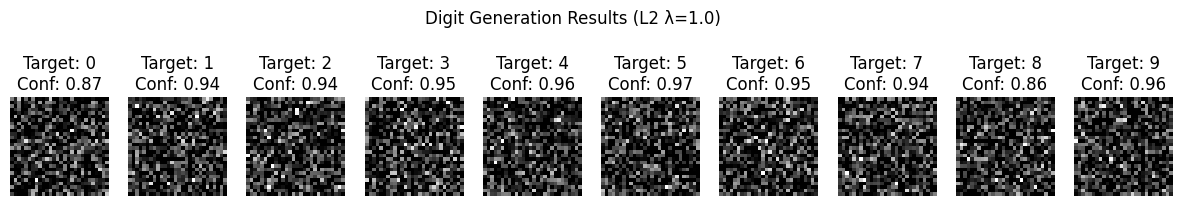

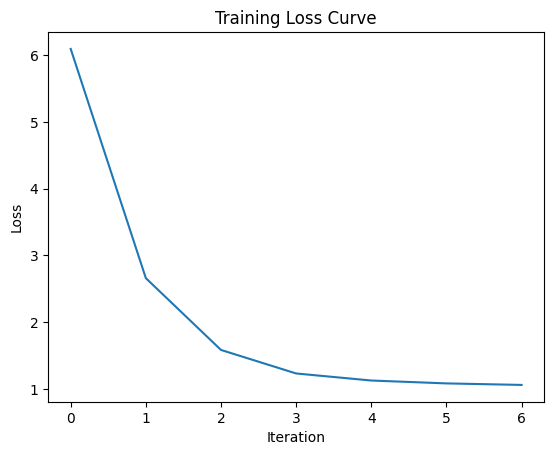


Generating with L2 λ=10.0
Iteration 0: Loss = 15.6104, Avg Confidence = 0.0288
Iteration 50: Loss = 11.8469, Avg Confidence = 0.3213
Iteration 100: Loss = 10.1583, Avg Confidence = 0.5926
Iteration 150: Loss = 9.5537, Avg Confidence = 0.7841
Iteration 200: Loss = 9.2169, Avg Confidence = 0.8561
Iteration 250: Loss = 8.9420, Avg Confidence = 0.8948
Iteration 299: Loss = 8.7007, Avg Confidence = 0.9174


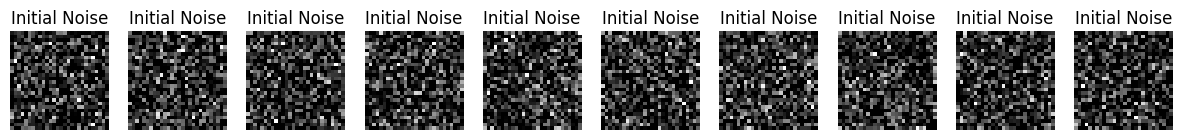

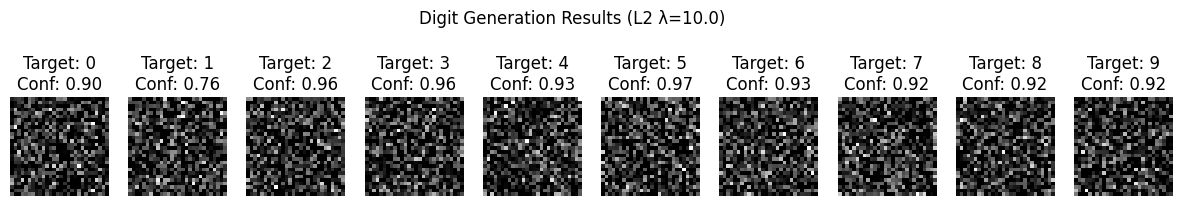

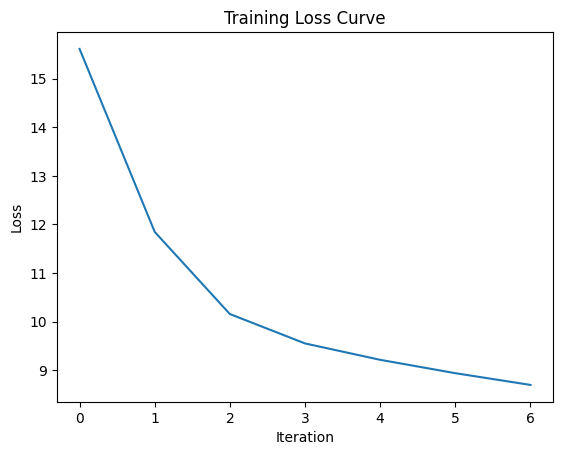

In [11]:
def generate_digits(model, lambda_l2=0.0, num_iterations=500):
    num_digits = 10
    # Initialize random noise images
    images = torch.randn((num_digits, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.arange(num_digits, device=device)

    # Inverse transform for visualization (undo MNIST normalization)
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'confidences': [], 'loss': []}

    # Store initial images (before any optimization)
    with torch.no_grad():
      initial_images = images.detach().clone().cpu()

    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, num_digits+i+1)
        init_img = inverse_normalize(initial_images[i]).clamp(0, 1).numpy()[0]
        plt.imshow(init_img, cmap='gray')
        plt.title("Initial Noise")
        plt.axis('off')


    for iteration in range(num_iterations):
        if images.grad is not None:
            images.grad.zero_()

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        confidences = probs[torch.arange(num_digits), targets]

        loss = nn.functional.cross_entropy(outputs, targets)
        loss += lambda_l2 * images.pow(2).mean()

        loss.backward()

        # update initial images based on gradient
        with torch.no_grad():
            images -= learning_rate * images.grad
            images.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized images for visualization
            with torch.no_grad():
                denorm_images = inverse_normalize(images).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_images)
                history['confidences'].append(confidences.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}, Avg Confidence = {confidences.mean().item():.4f}")

    # Visualization
    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, i+1)
        plt.imshow(history['images'][-1][i][0], cmap='gray')
        plt.title(f"Target: {i}\nConf: {history['confidences'][-1][i]:.2f}")
        plt.axis('off')

    plt.suptitle(f"Digit Generation Results (L2 λ={lambda_l2})")
    plt.show()

    # Plot loss curve
    plt.figure()
    plt.plot(history['loss'])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

    return images.detach()

def generate_hybrid(model, targets, weights=None, lambda_l2=0.0, num_iterations=500):
    if weights is None:
        weights = [1.0/len(targets)] * len(targets)

    image = torch.randn((1, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.tensor(targets, device=device)

    # Inverse transform for visualization
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'probs': [], 'loss': []}

    for iteration in range(num_iterations):
        if image.grad is not None:
            image.grad.zero_()

        output = model(image)
        probs = torch.softmax(output, dim=1)

        # calculate loss for both images at the same time
        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

        loss.backward()

        with torch.no_grad():
            image -= learning_rate * image.grad
            image.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized image
            with torch.no_grad():
                denorm_img = inverse_normalize(image).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_img)
                history['probs'].append(probs.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}")
            print("Probabilities:", {t: probs[0, t].item() for t in targets})

    # Visualization
    plt.figure(figsize=(10, 4))

    # Show final image (properly denormalized)
    final_img = history['images'][-1][0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(final_img, cmap='gray')
    plt.title(f"Hybrid of {targets.cpu().numpy()}")
    plt.axis('off')

    # Show probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), history['probs'][-1][0])
    plt.xticks(range(10))
    plt.ylim(0, 1)
    plt.title("Class Probabilities")

    plt.suptitle(f"Hybrid Digit Generation (L2 λ={lambda_l2})")
    plt.show()

    return image.detach()


print("\n=== Task 1: Generating digits 0-9 from noise ===")
generated_digits = generate_digits(model, lambda_l2=0.0)

print("\n=== Task 2: Generating hybrid digits ===")
hybrid_3_8 = generate_hybrid(model, [3, 8], lambda_l2=0.0)
hybrid_0_6 = generate_hybrid(model, [0, 6], lambda_l2=0.0)

print("\n=== Task 3: Testing L2 regularization ===")
l2_values = [0.001, 0.01, 0.1, 1.0, 10.0]
for l2 in l2_values:
    print(f"\nGenerating with L2 λ={l2}")
    _ = generate_digits(model, lambda_l2=l2, num_iterations=300)

# Questions
**Do the generated images resemble real MNIST digits? Why or why not?**

No, they not resemble real MNIST digits, the network sees patterns differently then humans and focuses on different weird (for humans) pixels.



 **Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously.**

  Idea: We wanted image that has ~50% chance for digit x and ~50% chance for digit y.
  My approach was to calculate loss for both target images, so loss for both images will matter and will change the inputs.
  It was implemented here:

        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

I did it for pairs [3,8] and [0,6]


**Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.**

I did the previous task with L2 penalty here:

        l2_values = [0.001, 0.01, 0.1, 1.0, 10.0]
        for l2 in l2_values:
            print(f"\nGenerating with L2 λ={l2}")
            _ = generate_digits(model, lambda_l2=l2, num_iterations=300)

L2 Penalty acts like a "noise tax", it punishes extreme pixel values and makes smoother images.
So we have a trade-off: More smoothing = nicer looking but less confident

PS. I don't know why the initial images look almost exactly the same, when I checked if they are different by doing:

        (images[0].detach().cpu() - initial_images[0]).abs().sum())

they are, but still I almost can't see that:(
